# Hypothesis Testing: Rate of Theft in Greater Vancouver During the Pandemic (2020-2022) 

## Introduction


By June 2020, the unemployment rate rose up to 13.5% in Vancouver according to the Vancouver Economic Commission. BC’s gdp alone was estimated to have a 5.1% decline. This would lead to lower economic well-being. If unemployment carries on for people with little to no disposable income, there is a possibility that they will resort to economic crimes. When unemployment increases by 1%, property crime is predicted to rise by 2% (Lin, 2008 as cited in Freeman, 1995; Bushway and Reuter 2002; Levitt, 2004). We wanted to see if that was the case in Vancouver. 

The data set we are using includes the “type” of crime, “year,” “month,” and “neighbourhood.” We will be contrasting the mean monthly occurrences of economic criminal activities before and during the pandemic using the dataset “Vancouver Crime Data.” Our independent variables are the year and months. We are assessing two or more categories: Neighborhood and  Type of crime.

We will be focusing on “economic crimes” which are the four types of theft reported in the data set: 1) Theft FROM vehicle 2) Theft OF vehicle 3) Theft of bicycle 4) other theft. 

We are using the measure “mean” to observe what's central to the observations or what a typical crime rate of theft looks like during the pandemic and determine if it is more than the pre-pandemic years.

#### We will be using hypothesis testing to determine our conclusion:

1. Null hypothesis (H0):  The mean crime rate of “economic crimes” during the pandemic (2020-2021) will be the same as the pre-pandemic years (2018-2019) in Vancouver

2. Alternative hypothesis (H1): The mean crime rate of “economic” crimes will be greater during the years of pandemic (2020-2021) than the pre-pandemic years(2018-2019) in Vancouver

## Preliminary Results


#### Importing Libraries

In [6]:
# Load required packages.
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)
library(broom)
library(digest)
library(testthat)

#### Importing the Data

In [7]:
#load pandemic and prepandanmic data
van_crime_data_pandemic <- read_csv("./crimedata_pandemic.csv")
van_crime_data_prepandemic <- read_csv("./crimedata_prepandemic.csv")

Rows: 69679 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 92527 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### Cleaning the Data

In [8]:
# We are only studying theft crime so we need to filter the data set
van_crime_pandemic_clean <- van_crime_data_pandemic %>%
    select(TYPE, YEAR, MONTH)%>%
     filter(TYPE == c("Other Theft","Theft from Vehicle","Theft of Bicycle","Theft of Vehicle"))

head(van_crime_pandemic_clean)

van_crime_prepandemic_clean <- van_crime_data_prepandemic %>%
    select(TYPE, YEAR, MONTH)%>%
         filter(TYPE == c("Other Theft","Theft from Vehicle","Theft of Bicycle","Theft of Vehicle"))

head(van_crime_prepandemic_clean)

Warning message in TYPE == c("Other Theft", "Theft from Vehicle", "Theft of Bicycle", :
“longer object length is not a multiple of shorter object length”


TYPE,YEAR,MONTH
<chr>,<dbl>,<dbl>
Other Theft,2020,2
Other Theft,2020,11
Other Theft,2020,3
Other Theft,2020,6
Other Theft,2020,9
Other Theft,2020,11


Warning message in TYPE == c("Other Theft", "Theft from Vehicle", "Theft of Bicycle", :
“longer object length is not a multiple of shorter object length”


TYPE,YEAR,MONTH
<chr>,<dbl>,<dbl>
Other Theft,2018,1
Other Theft,2018,12
Other Theft,2018,3
Other Theft,2018,8
Other Theft,2018,10
Other Theft,2018,4


In [9]:
# Number of crimes each month in pandemic time
van_crime_pandemic_month <- van_crime_pandemic_clean %>% 
group_by(MONTH) %>%
summarize(numOfCases = n())
van_crime_pandemic_month

MONTH,numOfCases
<dbl>,<int>
1,1063
2,961
3,897
4,730
5,692
6,711
7,871
8,908
9,832


In [10]:
# Number of crimes each month in prepandemic time
van_crime_prepandemic_month <- van_crime_prepandemic_clean %>% 
group_by(MONTH) %>%
summarize(numOfCases = n())
van_crime_prepandemic_month

MONTH,numOfCases
<dbl>,<int>
1,1345
2,1003
3,1224
4,1283
5,1316
6,1279
7,1364
8,1477
9,1390


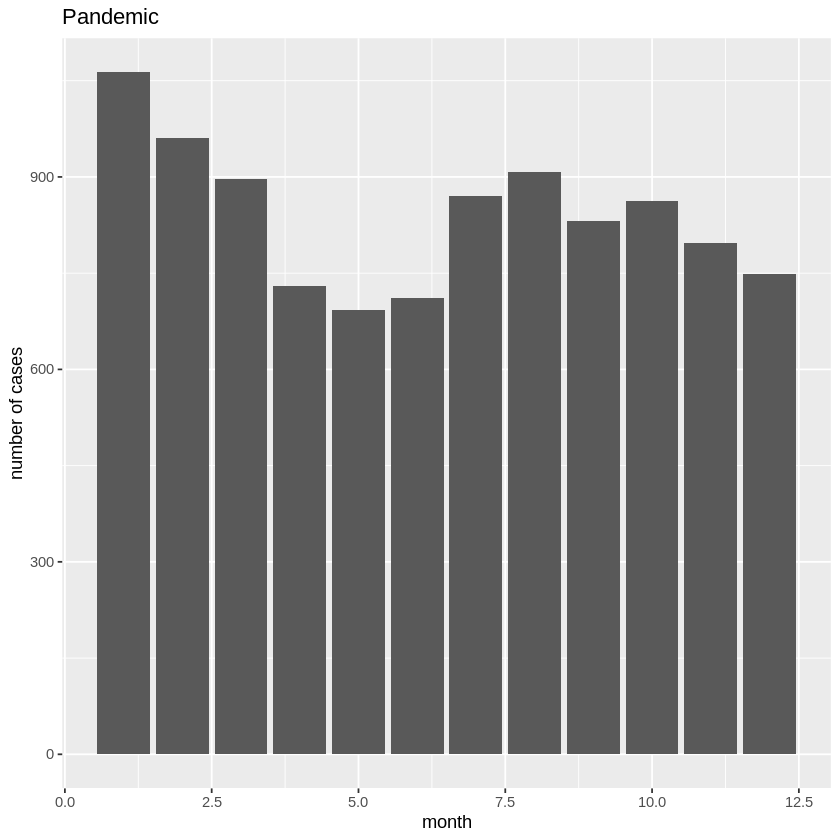

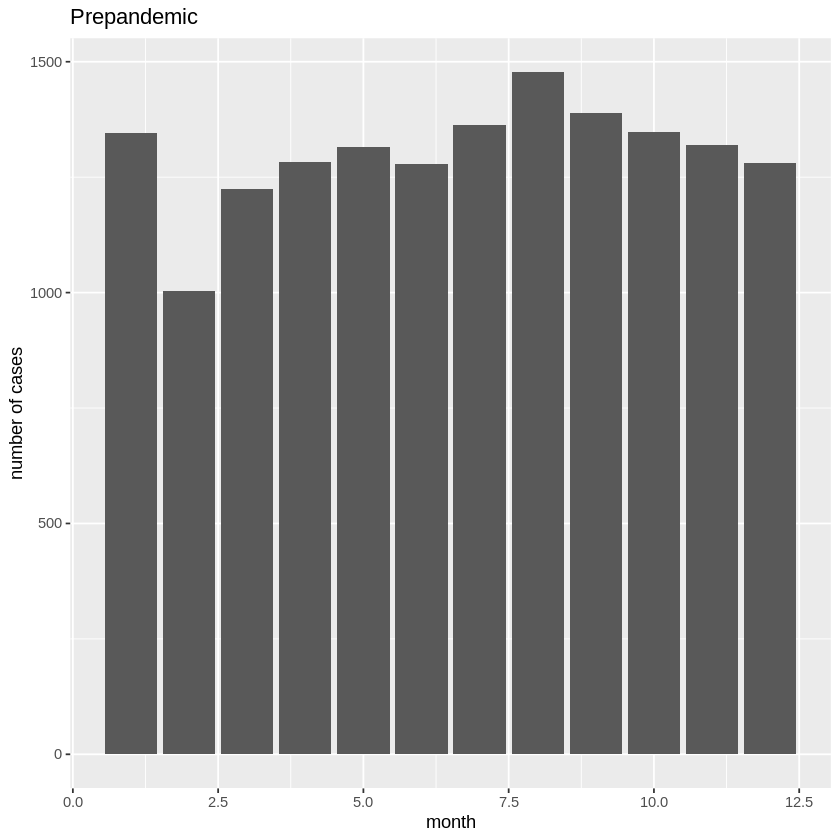

In [14]:
# Visulization
pandemic_crime_dist <- ggplot(van_crime_pandemic_month, aes(x = MONTH, y = numOfCases), binthwidth = 2) +
  geom_bar(stat = "identity") +
  xlab("month") +
  ylab("number of cases") +
  ggtitle("Pandemic")

prepandemic_crime_dist <- ggplot(van_crime_prepandemic_month, aes(x = MONTH, y = numOfCases), binthwidth = 2) +
  geom_bar(stat = "identity") +
  xlab("month") +
  ylab("number of cases") +
  ggtitle("Prepandemic")

pandemic_crime_dist
prepandemic_crime_dist

Now we have the graph, we noticed that for most of the month, the crimes cases in the prepandemic time is greater than the crimes cases in prepandemic time. However, the visual evidence is not convincing enough, so 

#### We will be using hypothesis testing to determine our conclusion:

1. Null hypothesis (H0):  The mean crime rate of “economic crimes” during the pandemic (2020-2021) will be the same as the pre-pandemic years (2018-2019) in Vancouver

2. Alternative hypothesis (H1): The mean crime rate of “economic” crimes will be greater during the years of pandemic (2020-2021) than the pre-pandemic years(2018-2019) in Vancouver

## Methods: Plan


#### What do you expect to find?

We expect to find that the crime rate increases during the pandemic compared to previous years (H1). If this alternate hypothesis is proved to be reasonable, we think it was because of the high unemployment rate and deteriorating economic situation due to the pandemic. Thus the number of cases of economic crimes would increase significantly. However, this assumption might also be incorrect since there were less activities outside because of the pandemic. However, we still think the “deteriorating economy” has a more significant impact on the crime rate than the “less activities”. So we expect to see the crime rate went up during the pandemic.

#### What impact could such findings have?

The result of our finding could help people to predict how the crime rate in Vancouver might be changing if a similar event happens again. (Not necessarily another pandemic, but a similar event like an economic recession.) This information might help the police department to better address the crime issue.

#### What future questions could this lead to?

The result of this research could inspire further investigation on what are the factors that lead to the increase or decrease of the crime rate in Vancouver. Our research is only an observational study that tries to answer whether the crime rate changes during the pandemic and we are not trying to explain the reason behind it.  More correlational study can be done on this topic so that we could gain a deeper understanding on social, economical and other factors and their relationships with crime. 

## References

Home - Vancouver Police Board. (n.d.). Retrieved November 4, 2022, from https://vancouverpoliceboard.ca/police/policeboard/agenda/2022/0421/R_7.2_2204P01_Q1-2022-PSI-Report-FINAL.pdf 

How covid-19 lockdowns affected crime in Vancouver. SFU Research. (n.d.). Retrieved November 4, 2022, from https://www.sfu.ca/research/scholarly-impacts/how-covid-19-lockdowns-affected-crime-vancouver?utm_source=Email_marketing&amp;utm_campaign=Wednesday_June_22_2022&amp;cmp=1&amp;utm_medium=HTMLEmail&amp;_ccCt=bvcv-2kdmjt-bqdx2f-iqazy6n6 

Lin, M.-J. (2008). Does Unemployment Increase Crime? Evidence from U.S. Data 1974-2000. The Journal of Human Resources, 43(2), 413–436. http://www.jstor.org/stable/40057352

VPD open data. (n.d.). Retrieved November 4, 2022, from https://geodash.vpd.ca/opendata/ 